In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from google.colab import files
uploaded=files.upload()

Saving time_series_ass3 to time_series_ass3


In [36]:
data=pd.read_csv('time_series_ass3')

In [7]:
data.head()

Unnamed: 0                 From   To (Interval: 15M)  PM10 (µg/m3)  \
0           0  2023-02-01 00:00:00  2023-02-01 00:15:00          95.0   
1           1  2023-02-01 00:15:00  2023-02-01 00:30:00          95.0   
2           2  2023-02-01 00:30:00  2023-02-01 00:45:00          95.0   
3           3  2023-02-01 00:45:00  2023-02-01 01:00:00         122.0   
4           4  2023-02-01 01:00:00  2023-02-01 01:15:00         122.0   

   PM2.5 (µg/m3)  NO (µg/m3)  
0           35.0         NaN  
1           35.0         NaN  
2           35.0         NaN  
3           34.0         NaN  
4           34.0         NaN

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [37]:
data=data.drop(columns='Unnamed: 0')

<Axes: >

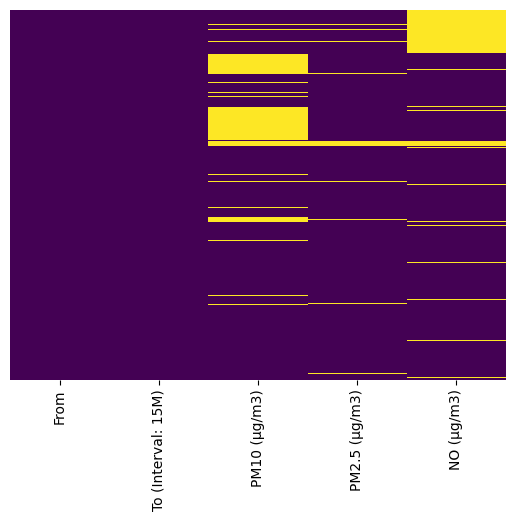

In [31]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
data['To (Interval: 15M)'] = pd.to_datetime(data.pop('To (Interval: 15M)'), format='%Y.%m.%d %H:%M:%S')

In [39]:
data['From']=pd.to_datetime(data.pop('From'), format='%Y.%m.%d %H:%M:%S')

In [34]:
data.head()

PM10 (µg/m3)  PM2.5 (µg/m3)  NO (µg/m3)  To (Interval: 15M)  \
0          95.0           35.0         NaN 2023-02-01 00:15:00   
1          95.0           35.0         NaN 2023-02-01 00:30:00   
2          95.0           35.0         NaN 2023-02-01 00:45:00   
3         122.0           34.0         NaN 2023-02-01 01:00:00   
4         122.0           34.0         NaN 2023-02-01 01:15:00   

                 From  
0 2023-02-01 00:00:00  
1 2023-02-01 00:15:00  
2 2023-02-01 00:30:00  
3 2023-02-01 00:45:00  
4 2023-02-01 01:00:00

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

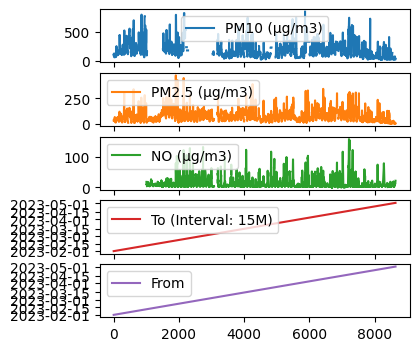

In [35]:
data.plot(subplots=True, figsize=(4, 4))

In [40]:
col=['PM10 (µg/m3)','PM2.5 (µg/m3)','NO (µg/m3)']
data[col]=data[col].interpolate(method='linear',limit_direction='both')

In [41]:
from sklearn.ensemble import IsolationForest
def remove_out(data, contamination=0.05):
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)
  outliers= isolation_forest.fit_predict(data)
  return data[outliers != -1]


In [33]:

data[col]=remove_out(data[col])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [42]:
from statsmodels.tsa.arima.model import ARIMA
data['To (Interval: 15M)'] = data['To (Interval: 15M)'].map(pd.Timestamp.timestamp)
data['From'] = data['From'].map(pd.Timestamp.timestamp)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           PM10 (µg/m3)   No. Observations:                 8640
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -44293.229
Date:                Thu, 13 Jul 2023   AIC                          88594.458
Time:                        19:22:36   BIC                          88622.714
Sample:                             0   HQIC                         88604.093
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0053     40.205      0.000      1.000     -78.794      78.805
ar.L2          0.0024      0.516      0.005      0.996      -1.008       1.013
ma.L1          0.0052     40.204      0.000      1.0

In [48]:
order = (2,1,1)
model = ARIMA(data['PM10 (µg/m3)'], order=order)
model_fit = model.fit()


forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecasted values:
8640    32.135939
8641    32.167523
8642    32.168012
8643    32.168089
8644    32.168091
8645    32.168091
8646    32.168091
8647    32.168091
8648    32.168091
8649    32.168091
Name: predicted_mean, dtype: float64


In [46]:
order = (2,1,1)
model = ARIMA(data['PM2.5 (µg/m3)'], order=order)
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)



Forecasted values:
8640     7.497515
8641     9.140414
8642    10.655062
8643    12.040663
8644    13.307728
8645    14.466376
8646    15.525882
8647    16.494731
8648    17.380678
8649    18.190818
Name: predicted_mean, dtype: float64


In [45]:
order = (2,1,1)
model = ARIMA(data['NO (µg/m3)'], order=order)
model_fit = model.fit()


forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             NO (µg/m3)   No. Observations:                 8640
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -21153.157
Date:                Thu, 13 Jul 2023   AIC                          42314.313
Time:                        19:25:14   BIC                          42342.569
Sample:                             0   HQIC                         42323.948
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3566      0.015     90.864      0.000       1.327       1.386
ar.L2         -0.5615      0.009    -60.156      0.000      -0.580      -0.543
ma.L1         -0.6345      0.016    -40.097      0.0